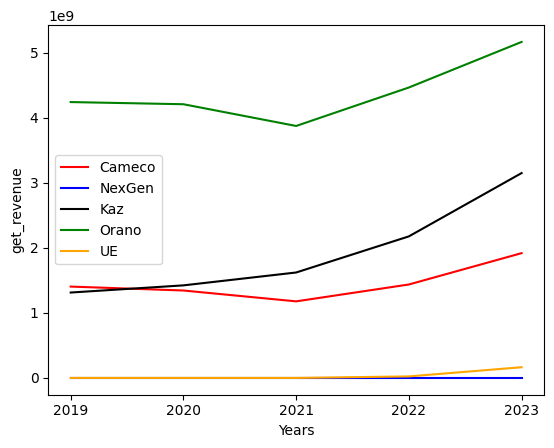

,2019,2020,2021,2022,2023
Cameco,"1,403,891,000.00000","1,343,480,000.00000","1,176,781,000.00000","1,436,143,000.00000","1,917,736,000.00000"
NexGen,0.00000,0.00000,0.00000,0.00000,0.00000
Kaz,"1,312,432,000.00000","1,422,532,000.00000","1,620,391,000.00000","2,175,491,000.00000","3,148,478,000.00000"
Orano,"4,239,788,000.00000","4,206,420,000.00000","3,872,420,000.00000","4,463,720,000.00000","5,164,107,000.00000"
UE,0.00000,0.00000,0.00000,"23,161,000.00000","164,389,000.00000"


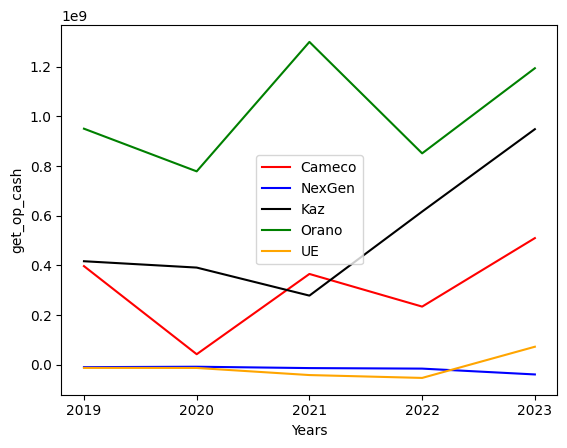

,2019,2020,2021,2022,2023
Cameco,"397,163,000.00000","42,459,000.00000","365,634,000.00000","234,185,000.00000","509,964,000.00000"
NexGen,"-9,650,000.00000","-7,932,000.00000","-13,394,000.00000","-15,512,000.00000","-38,993,000.00000"
Kaz,"416,850,000.00000","391,299,000.00000","278,414,000.00000","616,810,000.00000","948,569,000.00000"
Orano,"950,510,000.00000","778,713,000.00000","1,299,875,000.00000","851,236,000.00000","1,193,963,000.00000"
UE,"-12,573,000.00000","-12,870,000.00000","-41,470,000.00000","-52,987,000.00000","72,573,000.00000"


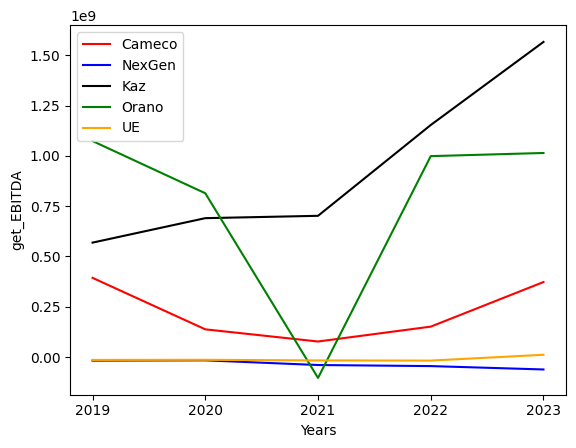

,2019,2020,2021,2022,2023
Cameco,"393,358,000.00000","137,488,000.00000","76,986,000.00000","150,932,000.00000","372,686,000.00000"
NexGen,"-18,099,000.00000","-16,620,000.00000","-39,921,000.00000","-45,241,000.00000","-62,040,000.00000"
Kaz,"568,708,000.00000","690,309,000.00000","701,982,000.00000","1,153,482,000.00000","1,566,629,000.00000"
Orano,"1,073,662,000.00000","814,109,000.00000","-104,085,000.00000","998,727,000.00000","1,014,436,000.00000"
UE,"-14,630,000.00000","-14,024,000.00000","-17,119,000.00000","-17,887,000.00000","10,986,000.00000"


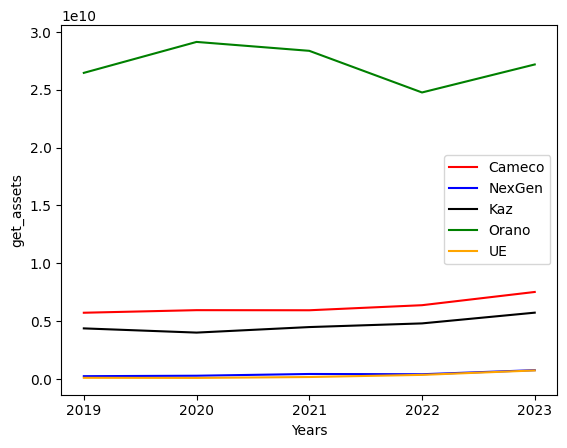

,2019,2020,2021,2022,2023
Cameco,"5,726,328,000.00000","5,949,483,000.00000","5,940,580,000.00000","6,378,503,000.00000","7,522,211,000.00000"
NexGen,"241,725,000.00000","280,483,000.00000","431,898,000.00000","409,747,000.00000","762,837,000.00000"
Kaz,"4,373,502,000.00000","4,009,730,000.00000","4,487,660,000.00000","4,805,009,000.00000","5,732,826,000.00000"
Orano,"26,463,921,000.00000","29,138,838,000.00000","28,369,157,000.00000","24,769,691,000.00000","27,190,229,000.00000"
UE,"101,040,000.00000","91,390,000.00000","169,541,000.00000","354,247,000.00000","737,589,000.00000"


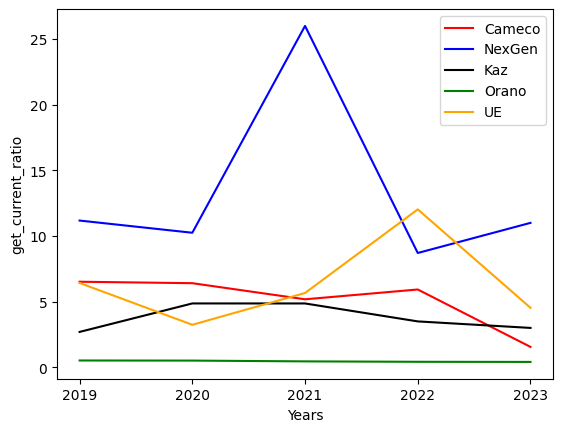

,2019,2020,2021,2022,2023
Cameco,6.51375,6.40273,5.17604,5.92260,1.54897
NexGen,11.17349,10.24452,25.99800,8.70321,10.99778
Kaz,2.69064,4.86044,4.85925,3.49193,2.99599
Orano,0.51501,0.50690,0.44723,0.41590,0.40586
UE,6.41810,3.23515,5.65566,12.02530,4.52723


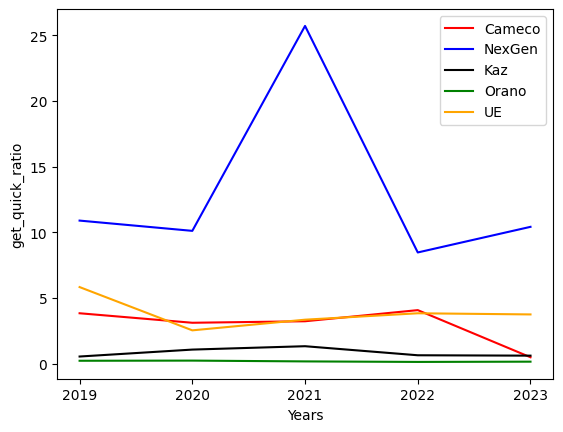

,2019,2020,2021,2022,2023
Cameco,3.82983,3.10539,3.22024,4.06862,0.47667
NexGen,10.89238,10.11016,25.72918,8.46385,10.41661
Kaz,0.53249,1.06105,1.31843,0.62836,0.59932
Orano,0.20953,0.22134,0.16029,0.12100,0.14070
UE,5.82546,2.52725,3.33959,3.82867,3.74069


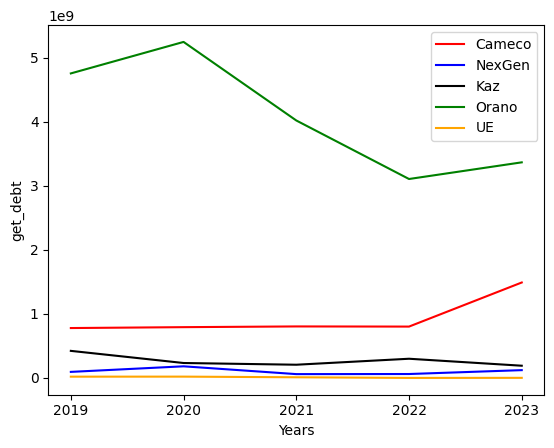

,2019,2020,2021,2022,2023
Cameco,"778,381,000.00000","792,291,000.00000","803,550,000.00000","801,215,000.00000","1,489,335,000.00000"
NexGen,"94,235,000.00000","181,199,000.00000","59,408,000.00000","60,945,000.00000","121,472,000.00000"
Kaz,"422,224,000.00000","232,832,000.00000","205,981,000.00000","299,309,000.00000","190,507,000.00000"
Orano,"4,752,553,000.00000","5,244,037,000.00000","4,017,969,000.00000","3,104,628,000.00000","3,364,651,000.00000"
UE,"19,600,000.00000","20,177,000.00000","10,075,000.00000",0.00000,"1,174,000.00000"


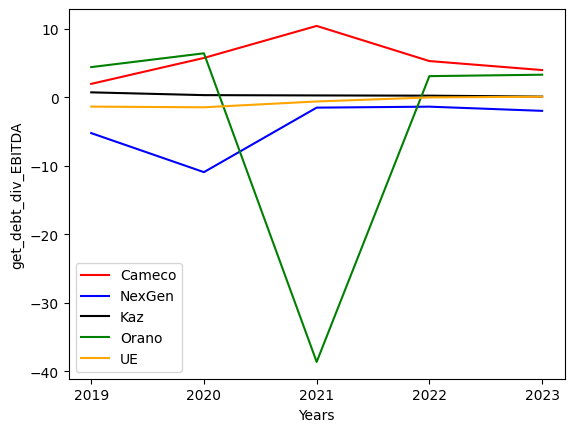

,2019,2020,2021,2022,2023
Cameco,1.97881,5.76262,10.43761,5.30845,3.99622
NexGen,-5.20664,-10.90247,-1.48814,-1.34712,-1.95796
Kaz,0.74243,0.33729,0.29343,0.25948,0.12160
Orano,4.42649,6.44144,-38.60277,3.10859,3.31677
UE,-1.33971,-1.43875,-0.58853,-0.00000,0.10686


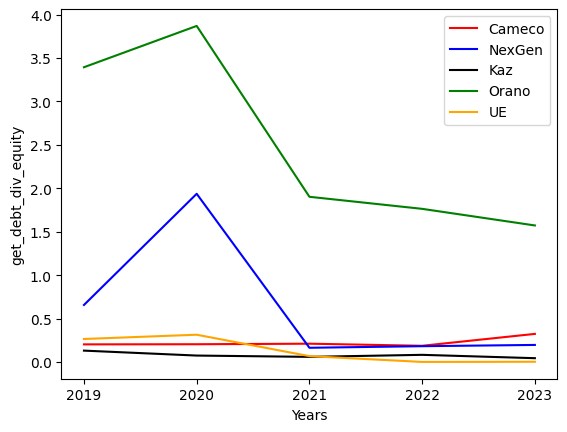

,2019,2020,2021,2022,2023
Cameco,0.20212,0.20359,0.20984,0.18581,0.32274
NexGen,0.65590,1.93609,0.16296,0.18112,0.19563
Kaz,0.13012,0.07321,0.05827,0.08161,0.04301
Orano,3.39343,3.86913,1.90151,1.76274,1.57150
UE,0.26405,0.31322,0.06652,0.00000,0.00186


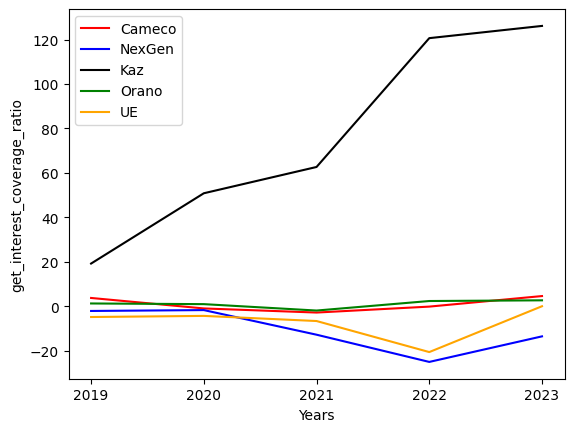

,2019,2020,2021,2022,2023
Cameco,3.72393,-0.99233,-2.84173,-0.16975,4.57809
NexGen,-2.12541,-1.73331,-12.81111,-25.05998,-13.55678
Kaz,19.20321,50.83632,62.66663,120.63760,126.13972
Orano,1.24513,0.94074,-1.93940,2.34760,2.65969
UE,-4.85164,-4.34759,-6.65602,-20.62741,0.00000


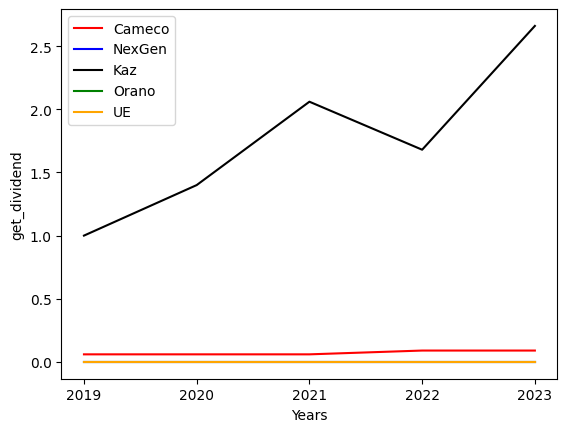

,2019,2020,2021,2022,2023
Cameco,0.06000,0.06000,0.06000,0.09000,0.09000
NexGen,0.00000,0.00000,0.00000,0.00000,0.00000
Kaz,1.00000,1.40000,2.06000,1.68000,2.66000
Orano,0.00000,0.00000,0.00000,0.00000,0.00000
UE,0.00000,0.00000,0.00000,0.00000,0.00000


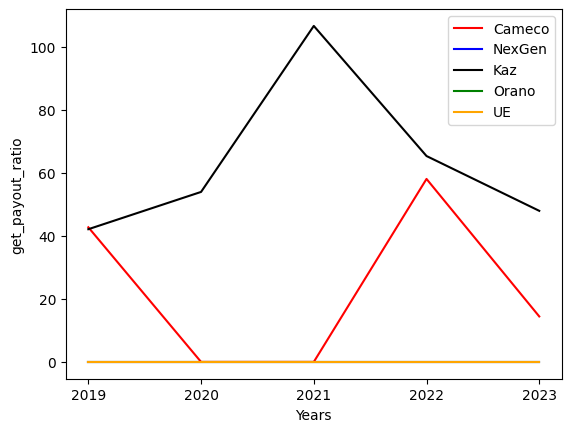

,2019,2020,2021,2022,2023
Cameco,42.72000,0.00000,0.00000,58.06000,14.43000
NexGen,0.00000,0.00000,0.00000,0.00000,0.00000
Kaz,42.11000,53.94000,106.61000,65.33000,47.94000
Orano,0.00000,0.00000,0.00000,0.00000,0.00000
UE,0.00000,0.00000,0.00000,0.00000,0.00000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display


def format_dataframe(df):
    for col in df.columns[1:]:
        if df[col].dtype == object:
            df[col] = df[col].str.replace(',', '').str.replace('"', '').str.replace('(', '-').str.replace(')','')
            df[col] = pd.to_numeric(df[col], errors='coerce') 
  
def to_csv(df, file_path):
    df.to_csv(file_path, index=False)
    
cameco_balance_path = 'CamecoCorporation_BalanceSheet_15-Jul-2024.csv'
cameco_cash_path = 'CamecoCorporation_CashFlow_15-Jul-2024.csv'
cameco_income_path = 'CamecoCorporation_IncomeStatement_16-Jul-2024.csv'

NexGen_balance_path = 'NexGenEnergyLtd._BalanceSheet_17-Jul-2024.csv'
NexGen_cash_path = 'NexGenEnergyLtd._CashFlow_17-Jul-2024.csv'
NexGen_income_path = 'NexGenEnergyLtd._IncomeStatement_17-Jul-2024.csv'

kaz_balance_path = 'JSCNationalAtomicCompanyKazatomprom_BalanceSheet_15-Jul-2024.csv'
kaz_cash_path = 'JSCNationalAtomicCompanyKazatomprom_CashFlow_15-Jul-2024.csv'
kaz_income_path = 'JSCNationalAtomicCompanyKazatomprom_IncomeStatement_15-Jul-2024.csv'

orano_balance_path = 'OranoSA_BalanceSheet_15-Jul-2024.csv'
orano_cash_path = 'OranoSA_CashFlow_15-Jul-2024.csv'
orano_income_path = 'OranoSA_IncomeStatement_15-Jul-2024.csv'

UE_balance_path = 'UraniumEnergyCorp._BalanceSheet_17-Jul-2024.csv'
UE_cash_path = 'UraniumEnergyCorp._CashFlow_17-Jul-2024.csv'
UE_income_path = 'UraniumEnergyCorp._IncomeStatement_17-Jul-2024.csv'

data_set_dict = {
    'Balance Sheets': [],
    'Cash Flows': [],
    'Income Statements': []
}
company_dict={
    'Cameco': [],
    'NexGen': [],
    'Kaz': [],
    'Orano': [],
    'UE': []  
}

cameco_balance = pd.read_csv(cameco_balance_path)
format_dataframe(cameco_balance)
data_set_dict['Balance Sheets'].append(cameco_balance)
to_csv(cameco_balance, cameco_balance_path)
cameco_cash = pd.read_csv(cameco_cash_path)
format_dataframe(cameco_cash)
data_set_dict['Cash Flows'].append(cameco_cash)
to_csv(cameco_cash, cameco_cash_path)
cameco_income = pd.read_csv(cameco_income_path)
format_dataframe(cameco_income)
data_set_dict['Income Statements'].append(cameco_income)
to_csv(cameco_income, cameco_income_path)

NexGen_balance = pd.read_csv(NexGen_balance_path)
format_dataframe(NexGen_balance)
data_set_dict['Balance Sheets'].append(NexGen_balance)
to_csv(NexGen_balance, NexGen_balance_path)
NexGen_cash = pd.read_csv(NexGen_cash_path)
format_dataframe(NexGen_cash)
data_set_dict['Cash Flows'].append(NexGen_cash)
to_csv(NexGen_cash, NexGen_cash_path)
NexGen_income = pd.read_csv(NexGen_income_path)
format_dataframe(NexGen_income)
data_set_dict['Income Statements'].append(NexGen_income)
to_csv(NexGen_income, NexGen_income_path)


kaz_balance = pd.read_csv(kaz_balance_path)
format_dataframe(kaz_balance)
data_set_dict['Balance Sheets'].append(kaz_balance)
to_csv(kaz_balance, kaz_balance_path)
kaz_cash = pd.read_csv(kaz_cash_path)
format_dataframe(kaz_cash)
data_set_dict['Cash Flows'].append(kaz_cash)
to_csv(kaz_cash, kaz_cash_path)
kaz_income = pd.read_csv(kaz_income_path)
format_dataframe(kaz_income)
data_set_dict['Income Statements'].append(kaz_income)
to_csv(kaz_income, kaz_income_path)

orano_balance = pd.read_csv(orano_balance_path)
format_dataframe(orano_balance)
data_set_dict['Balance Sheets'].append(orano_balance)
to_csv(orano_balance, orano_balance_path)
orano_cash = pd.read_csv(orano_cash_path)
format_dataframe(orano_cash)
data_set_dict['Cash Flows'].append(orano_cash)
to_csv(orano_cash, orano_cash_path)
orano_income = pd.read_csv(orano_income_path)
format_dataframe(orano_income)
data_set_dict['Income Statements'].append(orano_income)
to_csv(orano_income, orano_income_path)

UE_balance = pd.read_csv(UE_balance_path)
format_dataframe(UE_balance)
data_set_dict['Balance Sheets'].append(UE_balance)
to_csv(UE_balance, UE_balance_path)
UE_cash = pd.read_csv(UE_cash_path)
format_dataframe(UE_cash)
data_set_dict['Cash Flows'].append(UE_cash)
to_csv(UE_cash, UE_cash_path)
UE_income = pd.read_csv(UE_income_path)
format_dataframe(UE_income)
data_set_dict['Income Statements'].append(UE_income)
to_csv(UE_income, UE_income_path)



def graph(companies,func,data_set):
    years = [2019,2020,2021,2022,2023]
    colors = ['red', 'blue','black', 'green', 'orange', 'purple', 'pink', 'yellow','brown']
    for i in range(len(companies)):
        result = []
        func(data_set[i],result)
        plt.plot(years,result, label=f'{list(companies)[i]}', color=colors[i])
    plt.xlabel('Years')
    plt.xticks(years)
    plt.ylabel(func.__name__)
    plt.legend()
    plt.show()

def table(companies, func, data_set):
    years = [2019,2020,2021,2022,2023]
    results = {}
    for i in range(len(companies)):
        result = []
        func(data_set[i],result)
        results[list(companies)[i]]=result
    df = pd.DataFrame(results).T
    df.columns = years


    def color_increase_decrease(row):
        styles = [''] * len(row)
        for i in range(1, len(row)):
            if row.iloc[i] > row.iloc[i - 1]:
                styles[i] = 'background-color: green'
            elif row.iloc[i] < row.iloc[i - 1]:
                styles[i] = 'background-color: red'
        return styles

    
    def make_pretty(styler):
        styler.set_caption(func.__name__)
        styler.apply(lambda row: color_increase_decrease(row), axis=1)
        styler.set_properties(**{
            'text-align': 'center',
            'font-size': '12pt',
            'border': '1px solid white'
        }) 
        styler.format("{:,.5f}")
        return styler
        
    styled_df=df.style.pipe(make_pretty)
    display(styled_df)
 
def get_revenue(df,revenue_var):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'total revenue' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    revenue_var.insert(0,0)
                else:
                    revenue_var.insert(0,int(row[col])*1000)
            break
    if len(revenue_var)==0:   
        for i in range(5):
            revenue_var.insert(0,0)
            
def get_op_cash(df,cash_var):
        for index, row in df.iterrows():
            if isinstance(row.iloc[0], str) and 'cash from ops' in row.iloc[0].lower():
                for col in df.columns[2:]: 
                    if math.isnan(row[col]):
                        cash_var.insert(0,0)
                    else:
                        cash_var.insert(0,int(row[col])*1000)
                break
        if len(cash_var)==0:   
            for i in range(5):
                cash_var.insert(0,0)
            
def get_debt_div_equity(df,debt_equity):
    debt = []
    equity = []
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'total debt'== row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                        debt.append(1)
                else:
                        debt.append((row[col]))
        elif isinstance(row.iloc[0], str) and 'total equity'== row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    equity.append(1)
                else:
                    equity.append((row[col]))
    for i in range(len(debt)):
        debt_equity.insert(0,debt[i]/equity[i])

def get_assets(df,assets):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'total assets' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    assets.insert(0,0)
                else:
                    assets.insert(0,int(row[col])*1000)
            break
    if len(assets)==0:   
        for i in range(5):
            assets.insert(0,0)

def get_current_ratio(df,current_ratio):
        assets = []
        liabilities = []
        for index, row in df.iterrows():
            if isinstance(row.iloc[0], str) and 'total current assets'== row.iloc[0].lower():
                for col in df.columns[2:]: 
                    if math.isnan(row[col]):
                            assets.append(0)
                    else:
                            assets.append(int(row[col]))
            elif isinstance(row.iloc[0], str) and 'total current liabilities'== row.iloc[0].lower():
                for col in df.columns[2:]: 
                    if math.isnan(row[col]):
                        liabilities.append(1)
                    else:
                        liabilities.append(int(row[col]))
        for i in range(len(assets)):
            current_ratio.insert(0,assets[i]/liabilities[i])

def get_quick_ratio(df, quick):
        cash = []
        liabilities = []
        for index, row in df.iterrows():
            if isinstance(row.iloc[0], str) and 'cash & short term investments'== row.iloc[0].lower():
                for col in df.columns[2:]: 
                    if math.isnan(row[col]):
                            cash.append(0)
                    else:
                            cash.append(int(row[col]))
            elif isinstance(row.iloc[0], str) and 'total current liabilities'== row.iloc[0].lower():
                for col in df.columns[2:]: 
                    if math.isnan(row[col]):
                        liabilities.append(1)
                    else:
                        liabilities.append(int(row[col]))
        for i in range(len(cash)):
            quick.insert(0,cash[i]/liabilities[i])
            
def get_EBITDA(df,ebitda_var):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'ebitda' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                        ebitda_var.insert(0,0)
                else:
                        ebitda_var.insert(0,int(row[col])*1000)
            break
 
def get_debt(df,debt_var):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'total debt' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    debt_var.insert(0,0)
                else:
                    debt_var.insert(0,(row[col])*1000)
            break
 
def get_debt_div_EBITDA(df,debt_EBITDA):
        debt = []
        ebitda = []
        get_EBITDA(df,ebitda)
        get_debt(df,debt)
        for i in range(len(debt)):
            debt_EBITDA.append(debt[i]/ebitda[i])

def get_interest(df,interest):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'interest expense' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    interest.insert(0,0)
                else:
                    interest.insert(0,(row[col])*1000)
            break
    if len(interest)==0:   
        for i in range(5):
            interest.insert(0,0)
    
def get_EBIT(df,ebit):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'ebit' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    ebit.insert(0,0)
                else:
                    ebit.insert(0,(row[col])*1000)
            break
    if len(ebit)==0:   
        for i in range(5):
            ebit.insert(0,0)

def get_interest_coverage_ratio(df,interest_coverage):
    interest = []
    ebit = []
    get_interest(df,interest)
    get_EBIT(df,ebit)
    for i in range(len(interest)):
        try:
            interest_coverage.append((ebit[i])/(interest[i]*-1))
        except:
            interest_coverage.append(0)

def get_dividend(df,div):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'dividends per share' == row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    div.insert(0,0)
                else:
                    div.insert(0,(row[col]))
            break
    if len(div)==0:   
        for i in range(5):
            div.insert(0,0)   

def get_payout_ratio(df,payout):
    for index, row in df.iterrows():
        if isinstance(row.iloc[0], str) and 'payout ratio' in row.iloc[0].lower():
            for col in df.columns[2:]: 
                if math.isnan(row[col]):
                    payout.insert(0,0)
                else:
                    payout.insert(0,(row[col]))
            break
    if len(payout)==0:   
        for i in range(5):
            payout.insert(0,0)

            
                
# #get_revenue
graph(company_dict,get_revenue,data_set_dict['Income Statements'])
table(company_dict,get_revenue,data_set_dict['Income Statements'])
# #Cash Flow Graph
graph(company_dict,get_op_cash,data_set_dict['Cash Flows'])
table(company_dict,get_op_cash,data_set_dict['Cash Flows'])
# #EBTIDA
graph(company_dict,get_EBITDA,data_set_dict['Income Statements'])
table(company_dict,get_EBITDA,data_set_dict['Income Statements'])
# #Assets
graph(company_dict,get_assets,data_set_dict['Balance Sheets'])
table(company_dict,get_assets,data_set_dict['Balance Sheets'])
# #Current Ratio
graph(company_dict,get_current_ratio,data_set_dict['Balance Sheets'])
table(company_dict,get_current_ratio,data_set_dict['Balance Sheets'])
# quick ratio
graph(company_dict,get_quick_ratio,data_set_dict['Balance Sheets'])
table(company_dict,get_quick_ratio,data_set_dict['Balance Sheets'])
# #DEBT
graph(company_dict,get_debt,data_set_dict['Balance Sheets'])
table(company_dict,get_debt,data_set_dict['Balance Sheets'])
# #Debt/EBITDA
graph(company_dict,get_debt_div_EBITDA,data_set_dict['Balance Sheets'])
table(company_dict,get_debt_div_EBITDA,data_set_dict['Balance Sheets'])
# #D/E
graph(company_dict,get_debt_div_equity,data_set_dict['Balance Sheets'])
table(company_dict,get_debt_div_equity,data_set_dict['Balance Sheets'])
# #Interest Coverage
graph(company_dict,get_interest_coverage_ratio,data_set_dict['Income Statements'])
table(company_dict,get_interest_coverage_ratio,data_set_dict['Income Statements'])
#Dividends
graph(company_dict,get_dividend,data_set_dict['Income Statements'])
table(company_dict,get_dividend,data_set_dict['Income Statements'])
#dividend yeild
graph(company_dict,get_payout_ratio,data_set_dict['Income Statements'])
table(company_dict,get_payout_ratio,data_set_dict['Income Statements'])
      
